In [1]:
# Day 20 AOC Trench Map
import numpy as np
import matplotlib.pyplot as plt

class Image:
    def __init__(self, filename):
        with open(input_file, "r") as fp:
            f = fp.read()
        ie, image = f.split("\n\n")
        self.pixel = {
            "#" : 1,  # light
            "." : 0   # dark
        }
        self.revpixel = {
            1 : "\u2b1b",  # light
            0 : "\u2b1c"   # dark
        }
        image_enhancement = [self.pixel[i] for i in list(ie)]
        img = image.splitlines()
        imgarray = np.zeros((len(img),len(img[0])), dtype=int)
        for i in range(len(img)):
            for j in range(len(img[0])):
                imgarray[i,j] = self.pixel[img[i][j]]
        self.image = imgarray
        self.enhancement = image_enhancement
        self.surrounding = 0

    def enhance(self):
        pad = np.pad(self.image, 2, constant_values=self.surrounding)

        new_image = np.zeros(pad.shape, dtype=int)
        for i in range(0, pad.shape[0] - 2):
            for j in range(0, pad.shape[1] - 2):
                sub_array = pad[i : i + 3, j : j + 3].flatten()
                new_image[i, j] = self.enhancement[int("".join([str(i) for i in sub_array]),2)]
        self.image = new_image[0:-2, 0:-2]
        self.surrounding = self.enhancement[int(9 * str(self.surrounding),2)]

        return self.image, self.surrounding

    def count_lit(self):
        return np.sum(self.image)

    def plot(self):
        fig, ax = plt.subplots()
        # marker = "s"
        y,x = np.argwhere(self.image == 1).T
        plt.scatter(x,y)
        plt.gca().invert_yaxis()
        plt.axis("off")
        plt.show()
        
    def __repr__(self): 
        s = ""
        for i in range(self.image.shape[0]):
            s = s + "".join([self.revpixel[self.image[i,j]] for j in range(self.image.shape[1])])+"\n"
        return s

In [2]:
input_file = "input_files/day20.test.txt"
image = Image(input_file)

In [3]:
image.enhance()
print(image)

⬜⬛⬛⬜⬛⬛⬜
⬛⬜⬜⬛⬜⬛⬜
⬛⬛⬜⬛⬜⬜⬛
⬛⬛⬛⬛⬜⬜⬛
⬜⬛⬜⬜⬛⬛⬜
⬜⬜⬛⬛⬜⬜⬛
⬜⬜⬜⬛⬜⬛⬜



In [4]:
image.enhance()
print(image)

⬜⬜⬜⬜⬜⬜⬜⬛⬜
⬜⬛⬜⬜⬛⬜⬛⬜⬜
⬛⬜⬛⬜⬜⬜⬛⬛⬛
⬛⬜⬜⬜⬛⬛⬜⬛⬜
⬛⬜⬜⬜⬜⬜⬛⬜⬛
⬜⬛⬜⬛⬛⬛⬛⬛⬜
⬜⬜⬛⬜⬛⬛⬛⬛⬛
⬜⬜⬜⬛⬛⬜⬛⬛⬜
⬜⬜⬜⬜⬛⬛⬛⬜⬜



In [5]:
image.enhance()
print(image)

⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬜
⬜⬜⬛⬛⬜⬛⬜⬛⬛⬛⬜
⬜⬛⬛⬛⬜⬜⬛⬜⬛⬜⬛
⬛⬛⬛⬜⬜⬛⬜⬛⬜⬛⬛
⬛⬛⬛⬛⬜⬛⬛⬜⬛⬜⬜
⬛⬛⬛⬜⬜⬛⬜⬜⬜⬛⬛
⬜⬛⬜⬛⬜⬜⬜⬜⬛⬜⬜
⬜⬜⬛⬛⬜⬛⬜⬜⬛⬜⬛
⬜⬜⬜⬛⬜⬛⬛⬛⬛⬜⬜
⬜⬜⬜⬜⬛⬛⬛⬛⬜⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜



In [6]:
input_file = "input_files/day20.test.txt"
image = Image(input_file)
image.enhance()
image.enhance()
image.count_lit()
# Test case, part 1: 35

35

In [7]:
image = Image(input_file)
for i in range(50):
    image.enhance()
print("Step %d, lit: %d" % (i+1, image.count_lit()))
# Test case, part 2: 3551

Step 50, lit: 3351


In [8]:
input_file = "input_files/day20.txt"
image = Image(input_file)
image.enhance()
image.enhance()
image.count_lit()
# Test case, part 1: 5663

5663

In [9]:
image = Image(input_file)
for i in range(50):
    image.enhance()
print("Step %d, lit: %d" % (i + 1, image.count_lit()))
# Expecting 19638

Step 50, lit: 19638


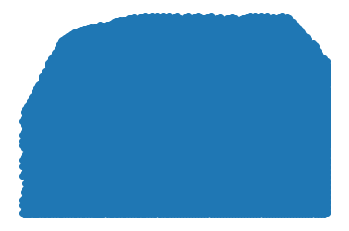

In [10]:
image.plot()